In [8]:
import plotly.graph_objects as go
import pandas as pd
import datetime 
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import numpy as np
import quandl

In [9]:
start = datetime.datetime(2021,1,1)
end = datetime.date.today()

#df = pd.read_csv('AAPL.csv')
df = web.DataReader( 'AAPl',  'yahoo',  start, end)
#df.to_csv('AAPl.csv')
df.head()
df.shape
#checking if the dataset has any null values
df.isnull().sum()
df.describe()
#df['Date'].max() — df['Date'].min()

,High,Low,Open,Close,Volume,Adj Close
count,307.000000,307.000000,307.000000,307.000000,3.070000e+02,307.000000
mean,147.083128,143.926384,145.479609,145.576515,9.159084e+07,145.100626
std,17.117318,16.585785,16.812452,16.884207,2.815811e+07,17.102948
min,120.400002,116.209999,119.029999,116.360001,4.100000e+07,115.672501
25%,132.315002,129.430000,130.755005,130.964996,7.130415e+07,130.054260
50%,146.550003,143.820007,144.690002,145.600006,8.807120e+07,145.025421
75%,160.724998,155.250000,158.675003,158.870003,1.064632e+08,158.768707
max,182.940002,179.119995,182.630005,182.009995,1.954327e+08,181.778397


import matplotlib.pyplot as plt
plt.plot(df['Close'])
plt.plot(df['Adj Close'])

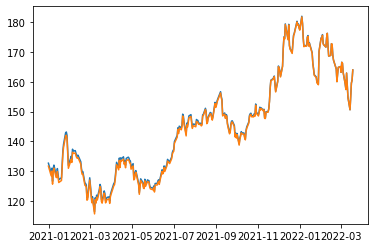

In [10]:


plt.plot(df['Close'])
plt.plot(df['Adj Close'])
#plt.plot(df['AAPL.Close'])
#plt.plot(df['mavg'])




In [11]:
df.reset_index(inplace=True,drop=False)
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])
fig.update_layout(paper_bgcolor="black",plot_bgcolor="black")

fig.show()
 

In [12]:
 from pandas_profiling import ProfileReport

In [13]:
#profile = ProfileReport(df)

#profile.to_file(output_file='Stocks1.html')

# denoting the daily returns in the price of the stock

In [14]:
df['Day_Perc_Change'] = df['Adj Close'].pct_change()*100
 
df.dropna(axis =0 , inplace = True)
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Day_Perc_Change
1,2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,128.453445,-2.471936
2,2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,130.041595,1.236362
3,2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,125.664223,-3.366133
4,2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,129.952286,3.412318
5,2021-01-08,132.630005,130.229996,132.429993,132.050003,105158200.0,131.073929,0.863119


<AxesSubplot:>

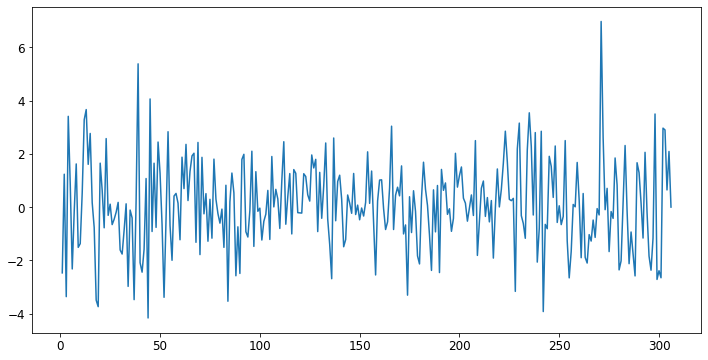

In [15]:
 df['Day_Perc_Change'].plot(figsize = (12, 6), fontsize = 12)

C:\Users\prakhar\AppData\Local\Temp\ipykernel_12204\1054008026.py:4: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



count    306.000000
mean       0.085247
std        1.654462
min       -4.167349
25%       -0.915073
50%        0.030908
75%        1.227003
max        6.977762
Name: Day_Perc_Change, dtype: float64

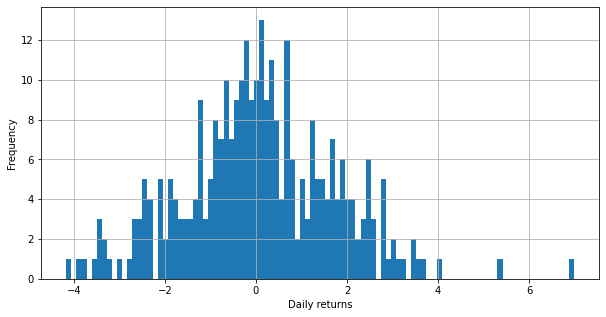

In [16]:
df['Day_Perc_Change'].hist(bins = 100, figsize = (10,5)) 
plt.xlabel('Daily returns')
plt.ylabel('Frequency')
plt.show()
#satistics
df.Day_Perc_Change.describe()

In [17]:
 #The daily returns histogram is centered about origin.
#For the past 2 years, the mean daily returns has been about 0.072 and
#for most of the days the daily return wasless than 1% implying that the APPL
#stock has been less volatile over the period. During the period, 
#the highest % change in positive direction was observed to be 6.97% and was 4.16%
#in negative direction. Clearly, we didn’t had any instances of ‘bull run’ 
#or ‘bear drop’!

In [19]:
# import yfinance as yf
# tickers_list = ['AAPL', 'MSFT', 'GOOG']
# data = pd.DataFrame(columns=tickers_list)
# for ticker in tickers_list:
#     data[ticker] =  web.DataReader( ticker,  'yahoo',  start, end)['Adj Close']
    
# # Print first 5 rows of the data
# data.head

ConnectionError: HTTPSConnectionPool(host='finance.yahoo.com', port=443): Read timed out.

In [35]:
google = web.DataReader( 'GOOG',  'yahoo',  start, end)
apple = web.DataReader( 'AAPL',  'yahoo',  start, end)
microsoft = web.DataReader( 'MSFT',  'yahoo',  start, end)

In [36]:
data['GOOG'] = google['Adj Close']
data['AAPL'] = apple['Adj Close']
data['MSFT'] = microsoft['Adj Close']

In [37]:
data.head()

,AAPL,MSFT,GOOG
Date,,,
2020-12-31,131.709198,220.115967,1751.880005
2021-01-04,128.453445,215.434967,1728.239990
2021-01-05,130.041611,215.642792,1740.920044
2021-01-06,125.664207,210.051285,1735.290039
2021-01-07,129.952271,216.028748,1787.250000


<AxesSubplot:xlabel='Date'>

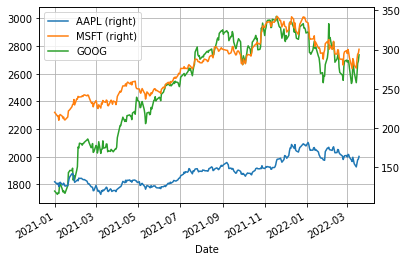

In [38]:
data.plot(secondary_y = ["AAPL", "MSFT"], grid = True)


In [39]:
stock_change = data.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change.head()

,AAPL,MSFT,GOOG
Date,,,
2020-12-31,NaN,NaN,NaN
2021-01-04,-0.025030,-0.021495,-0.013586
2021-01-05,0.012288,0.000964,0.007310
2021-01-06,-0.034241,-0.026272,-0.003239
2021-01-07,0.033554,0.028060,0.029504


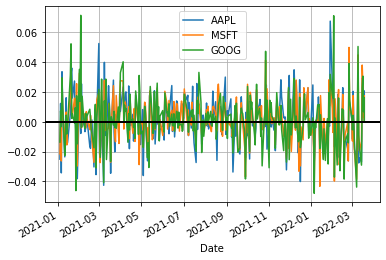

In [40]:
stock_change.plot(grid = True).axhline(y = 0, color = "black", lw = 2) 

In [33]:
spyder = web.DataReader("SPY", "yahoo", start, end) 

In [34]:
spyder.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-31,374.660004,371.230011,371.779999,373.880005,78520700.0,367.819122
2021-01-04,375.450012,364.820007,375.309998,368.790009,110210800.0,362.811676
2021-01-05,372.500000,368.049988,368.100006,371.329987,66426200.0,365.310455
2021-01-06,376.980011,369.119995,369.709991,373.549988,107997700.0,367.494446
2021-01-07,379.899994,375.910004,376.100006,379.100006,68766800.0,372.954498


In [41]:
data['SPY'] = spyder['Adj Close']

In [42]:
# comparing it with SPY data
stock_change = data.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change.head()

,AAPL,MSFT,GOOG,SPY
Date,,,,
2020-12-31,NaN,NaN,NaN,NaN
2021-01-04,-0.025030,-0.021495,-0.013586,-0.013707
2021-01-05,0.012288,0.000964,0.007310,0.006864
2021-01-06,-0.034241,-0.026272,-0.003239,0.005961
2021-01-07,0.033554,0.028060,0.029504,0.014748


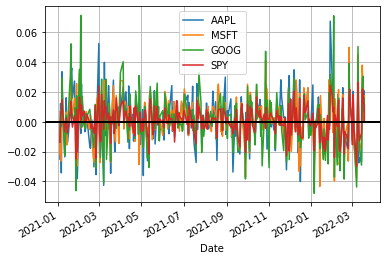

In [43]:
stock_change.plot(grid = True).axhline(y = 0, color = "black", lw = 2) 

In [44]:
stock_change_apr = data * 252 * 100    # There are 252 trading days in a year; the 100 converts to percentages
stock_change_apr.tail()

,AAPL,MSFT,GOOG,SPY
Date,,,,
2022-03-15,3.908268e+06,7.236180e+06,6.534889e+07,1.070622e+07
2022-03-16,4.021668e+06,7.418628e+06,6.738001e+07,1.094363e+07
2022-03-17,4.047624e+06,7.439544e+06,6.783865e+07,1.108054e+07
2022-03-18,4.132296e+06,7.570836e+06,6.894796e+07,1.120190e+07
2022-03-18,4.132296e+06,7.570836e+06,6.894796e+07,1.120190e+07


In [52]:
#the risk-free rate, which I denote by r_{RF}, is the rate 
#of return on a risk-free financial asset. This asset exists only in theory
# but often yields on low-risk instruments like 3-month U.S. Treasury Bills can be viewed as being virtually risk-free and thus their yields can be used to approximate the risk-free rate.
tbill = pd.read_csv('./TB3MS.csv', index_col=False)
tbill.head()

,DATE,TB3MS
0,2021-02-01,0.04
1,2021-03-01,0.03
2,2021-04-01,0.02
3,2021-05-01,0.02
4,2021-06-01,0.04


In [48]:
import plotly.express as px
fig = px.line(tbill, x="DATE", y="TB3MS")
fig.show()

In [54]:
rrf = tbill['TB3MS'].iloc[-1]    # Get the most recent Treasury Bill rate
rrf

0.33

In [55]:
smcorr = stock_change_apr.drop("SPY", 1).corrwith(stock_change_apr.SPY)    # Since RRF is constant it doesn't change the
                                                                           # correlation so we can ignore it in our
                                                                           # calculation
smcorr

C:\Users\prakhar\AppData\Local\Temp\ipykernel_12204\2970449786.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



AAPL    0.810927
MSFT    0.965442
GOOG    0.966113
dtype: float64

In [56]:
sy = stock_change_apr.drop("SPY", 1).std()
sx = stock_change_apr.SPY.std()
sy

C:\Users\prakhar\AppData\Local\Temp\ipykernel_12204\1854261323.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



AAPL    4.309943e+05
MSFT    8.995303e+05
GOOG    8.723913e+06
dtype: float64

In [57]:
sx

734674.1068969879

In [58]:
ybar = stock_change_apr.drop("SPY", 1).mean() - rrf
xbar = stock_change_apr.SPY.mean() - rrf
ybar

C:\Users\prakhar\AppData\Local\Temp\ipykernel_12204\739597097.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



AAPL    3.656535e+06
MSFT    7.021390e+06
GOOG    6.406147e+07
dtype: float64

In [59]:
xbar

10717750.801476486

In [60]:
beta = smcorr * sy / sx
alpha = ybar - beta * xbar
beta

AAPL     0.475728
MSFT     1.182081
GOOG    11.472139
dtype: float64

In [61]:
alpha

AAPL   -1.442199e+06
MSFT   -5.647863e+06
GOOG   -5.889405e+07
dtype: float64

In [62]:
sharpe = (ybar - rrf)/sy
sharpe

AAPL    8.483953
MSFT    7.805617
GOOG    7.343203
dtype: float64

In [63]:
(xbar - rrf)/sx

14.58844182864236